<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   seqn     6795 non-null   int64  
 1   sex      6795 non-null   object 
 2   age      6795 non-null   float64
 3   re       6795 non-null   object 
 4   income   6475 non-null   object 
 5   tx       6795 non-null   int64  
 6   dx       6795 non-null   int64  
 7   wt       6795 non-null   float64
 8   ht       6795 non-null   float64
 9   bmi      6795 non-null   float64
 10  leg      6564 non-null   float64
 11  arml     6616 non-null   float64
 12  armc     6607 non-null   float64
 13  waist    6556 non-null   float64
 14  tri      6314 non-null   float64
 15  sub      5824 non-null   float64
 16  gh       6795 non-null   float64
 17  albumin  6706 non-null   float64
 18  bun      6706 non-null   float64
 19  SCr      6706 non-null   float64
dtypes: float64(14), int64(3), object(3)
memory usage: 1.

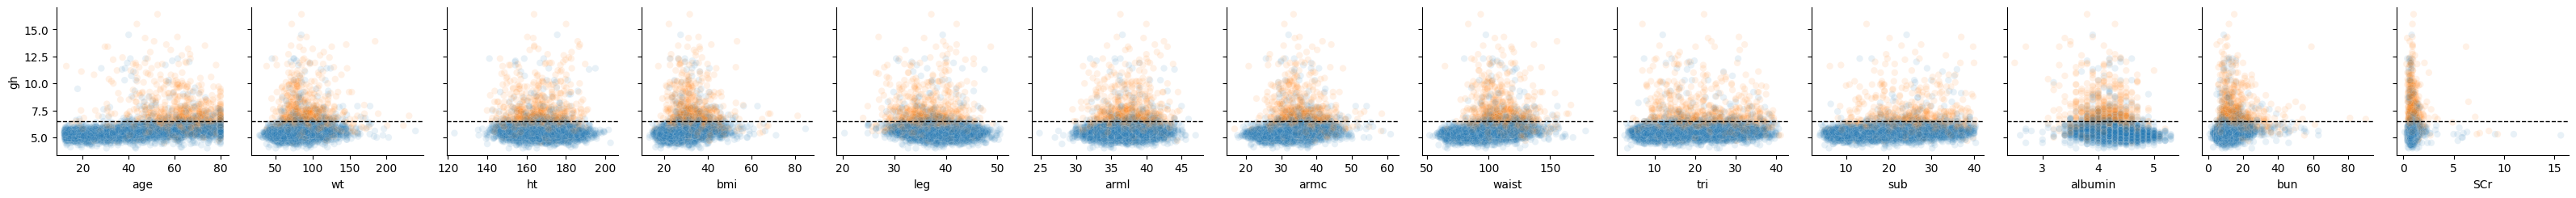

In [1]:
import os
import pandas as pd

# Investigate impact of variables on presence of diabetes
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset
DATA_PATH = os.path.join("data", "nhgh.tsv")
gh_data = pd.read_csv(DATA_PATH, sep='\t')
gh_data.info()

# Setting of target variable
DIABETES_THRESH = 6.5 # diabetes threshold in %, diabetes is defined as gh >= DIABETES THRESH
gh_data["diabetes"] = [1 if x >= DIABETES_THRESH else 0 for x in gh_data["gh"]]
gh_data["diabetes"].value_counts()

# Defining categorical variables
cat_attribs = ["sex", "re", "income", "tx", "dx"]
excluded_attribs = ["seqn", "gh", "diabetes"] # remove seqn from the numerical variables
num_attribs = [x for x in gh_data.columns if x not in cat_attribs+excluded_attribs]

print(cat_attribs)
print(num_attribs)

gh_data.describe()

def numeric_scatter_facetby_dx(data, x_vars, y, hue, y_thresh):
    """Wrapper for PairGrid to create coloured plot with line divider"""
    num_facet = sns.PairGrid(data, x_vars=x_vars, y_vars=y, hue=hue)
    num_facet.map(sns.scatterplot, alpha=0.1)
    for ax in num_facet.axes.ravel():
        ax.axhline(y=y_thresh, ls='--', linewidth=1, c='black')
    plt.show()

numeric_scatter_facetby_dx(gh_data, x_vars=num_attribs, y="gh", hue="dx", y_thresh=6.5)
